# Computer Vision



In [3]:
!pip install opencv-python


Original Image

Original Colorful Image :


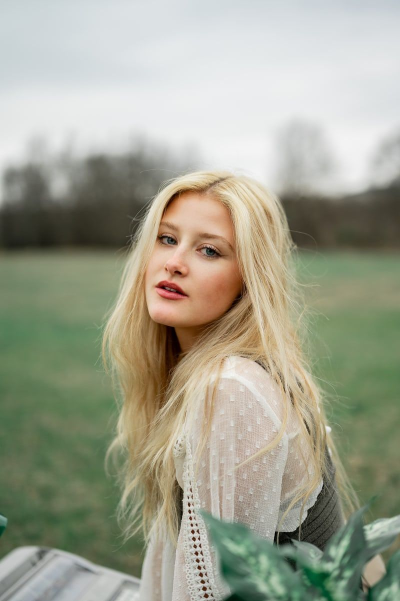

In [4]:
import cv2
import os
from google.colab.patches import cv2_imshow

image_path = '/content/img.jpg'
if not os.path.exists(image_path):
    print(f"Error: The file {image_path} does not exist.")
else:
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if image is None:
        print("Error: Could not load the image. Please check the file path and file format.")
    else:
        # Resize the image to a smaller size
        small_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)  # Resize to half of the original size

        # Display the smaller image
        print("Original Colorful Image :")
        cv2_imshow(small_image)


Grayscale Conversion
1 Convert the input color image to grayscale.

Transition video saved to /content/transition_video.mp4


Resized grayscale image saved to /content/resized_grayscale_image.jpg


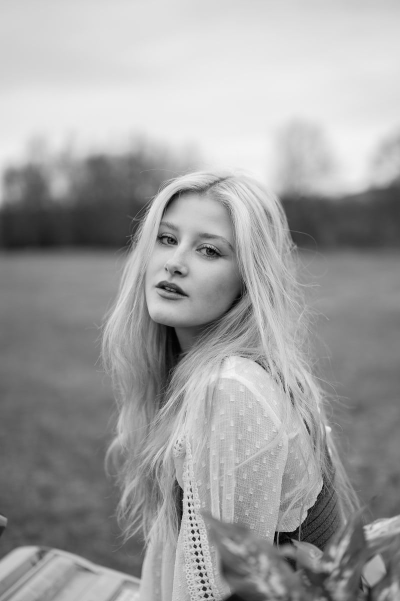

In [5]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow

# Path to the image file
image_path = '/content/img.jpg'

# Check if the file exists
if not os.path.exists(image_path):
    print(f"Error: The file {image_path} does not exist.")
else:
    # Load the image
    image = cv2.imread(image_path)

    # Check if the image was loaded correctly
    if image is None:
        print("Error: Could not load the image. Please check the file path and file format.")
    else:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Convert the grayscale image back to BGR format for blending
        gray_image_bgr = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)

        # Resize the images to a smaller size
        image_resized = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
        gray_image_resized = cv2.resize(gray_image_bgr, (0, 0), fx=0.5, fy=0.5)

        # Get the dimensions of the resized image
        height, width, _ = image_resized.shape

        # Define the codec and create VideoWriter object
        video_path = '/content/transition_video.mp4'
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 format
        video = cv2.VideoWriter(video_path, fourcc, 20.0, (width, height))

        # Create a copy of the color image to display the transition
        transition_image = image_resized.copy()

        # Perform the transition from color to grayscale from top to bottom
        for i in range(height):
            transition_image[i] = gray_image_resized[i]
            video.write(transition_image)

        # Release the video writer
        video.release()
        print(f"Transition video saved to {video_path}")

        # Display the video using cv2_imshow
        from IPython.display import display, Video
        display(Video(video_path, embed=True))

        # Save the final grayscale image
        output_path = '/content/resized_grayscale_image.jpg'
        cv2.imwrite(output_path, gray_image_resized)
        print(f"Resized grayscale image saved to {output_path}")

        # Display the final grayscale image
        cv2_imshow(gray_image_resized)


Gaussian Blur
1. Apply Gaussian blur to the grayscale image to reduce noise.
2. Implement the Gaussian kernel manually and apply it using convolution.

Transition video saved to /content/gaussian_blur_transition.mp4


Resized blurred grayscale image saved to /content/resized_blurred_grayscale_image.jpg
Resized Blurred Grayscale Image:


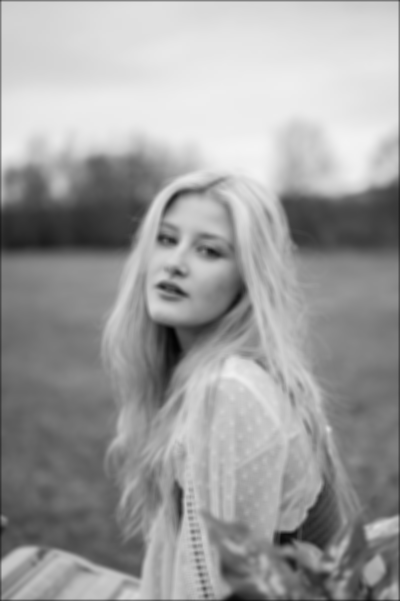

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Video
import os

# Function to generate a Gaussian kernel
def gaussian_kernel(size, sigma=1):
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(- ((x - (size-1) / 2)**2 + (y - (size-1) / 2)**2) / (2 * sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

# Function to apply convolution
def convolve(image, kernel):
    height, width = image.shape
    kernel_size = kernel.shape[0]
    pad = kernel_size // 2

    # Pad the image with zeros on all sides
    padded_image = np.pad(image, pad, mode='constant')

    # Initialize the output image
    blurred_image = np.zeros_like(image)

    # Perform the convolution
    for i in range(height):
        for j in range(width):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            blurred_image[i, j] = np.sum(region * kernel)

    return blurred_image

# Load the grayscale image
gray_image_path = '/content/img.jpg'
gray_image = cv2.imread(gray_image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if gray_image is None:
    print("Error: Could not load the image. Please check the file path and file format.")
else:
    # Resize the grayscale image
    resized_gray_image = cv2.resize(gray_image, (0, 0), fx=0.5, fy=0.5)  # Resize to half of the original size

    # Define parameters for the Gaussian blur
    kernel_size = 5
    sigma_start = 0.1
    sigma_end = 3.0
    num_frames = 50

    # Prepare to write video
    height, width = resized_gray_image.shape
    video_path = '/content/gaussian_blur_transition.mp4'
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(video_path, fourcc, 20.0, (width, height), isColor=False)

    # Generate frames with increasing Gaussian blur
    for sigma in np.linspace(sigma_start, sigma_end, num_frames):
        kernel = gaussian_kernel(kernel_size, sigma)
        blurred_image = convolve(resized_gray_image, kernel)
        video.write(blurred_image.astype(np.uint8))

    # Release the video writer
    video.release()
    print(f"Transition video saved to {video_path}")

    # Display the video using IPython's display function
    display(Video(video_path, embed=True))

    # Save and display the final blurred image
    final_blurred_image = blurred_image.astype(np.uint8)
    blurred_image_path = '/content/resized_blurred_grayscale_image.jpg'
    cv2.imwrite(blurred_image_path, final_blurred_image)
    print(f"Resized blurred grayscale image saved to {blurred_image_path}")

    print("Resized Blurred Grayscale Image:")
    cv2_imshow(final_blurred_image)


Gradient Calculation
1. Calculate the intensity gradients of the image using all four filters you have
studied.
2. Compute the gradient magnitude and direction (angle).

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Video
import os

def compute_gradient_magnitude_direction(grad_x, grad_y):
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x)
    direction = np.degrees(direction)  # Convert radians to degrees
    return magnitude, direction

def save_frames_as_video(frames, video_path, fps=10):
    height, width = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(video_path, fourcc, fps, (width, height), isColor=False)

    for frame in frames:
        video.write(np.uint8(frame))

    video.release()

# Load the grayscale image
image_path = '/content/img.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not load the image. Please check the file path and file format.")
else:
    # Resize the image to a smaller size
    resized_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)  # Resize to half of the original size

    # Prepare directories to save frames
    os.makedirs('/content/prewitt_frames', exist_ok=True)
    os.makedirs('/content/sobel_frames', exist_ok=True)
    os.makedirs('/content/marr_hildreth_frames', exist_ok=True)
    os.makedirs('/content/log_frames', exist_ok=True)

    # 1. Prewitt Filter
    prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

    grad_x_prewitt = cv2.filter2D(resized_image, cv2.CV_64F, prewitt_kernel_x)
    grad_y_prewitt = cv2.filter2D(resized_image, cv2.CV_64F, prewitt_kernel_y)

    magnitude_prewitt, direction_prewitt = compute_gradient_magnitude_direction(grad_x_prewitt, grad_y_prewitt)

    # Save frames for Prewitt
    prewitt_frames = [magnitude_prewitt, direction_prewitt]
    for i, frame in enumerate(prewitt_frames):
        cv2.imwrite(f'/content/prewitt_frames/frame_{i:03d}.png', frame)

    # 2. Sobel Filter
    grad_x_sobel = cv2.Sobel(resized_image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y_sobel = cv2.Sobel(resized_image, cv2.CV_64F, 0, 1, ksize=3)

    magnitude_sobel, direction_sobel = compute_gradient_magnitude_direction(grad_x_sobel, grad_y_sobel)

    # Save frames for Sobel
    sobel_frames = [magnitude_sobel, direction_sobel]
    for i, frame in enumerate(sobel_frames):
        cv2.imwrite(f'/content/sobel_frames/frame_{i:03d}.png', frame)

    # 3. Marr-Hildreth (Laplacian of Gaussian)
    blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 1.0)
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
    magnitude_marr_hildreth, direction_marr_hildreth = compute_gradient_magnitude_direction(laplacian, laplacian)

    # Save frames for Marr-Hildreth
    marr_hildreth_frames = [magnitude_marr_hildreth, direction_marr_hildreth]
    for i, frame in enumerate(marr_hildreth_frames):
        cv2.imwrite(f'/content/marr_hildreth_frames/frame_{i:03d}.png', frame)

    # 4. Laplacian of Gaussian (LoG) Filter
    log = cv2.Laplacian(blurred_image, cv2.CV_64F)
    magnitude_log, direction_log = compute_gradient_magnitude_direction(log, log)

    # Save frames for LoG
    log_frames = [magnitude_log, direction_log]
    for i, frame in enumerate(log_frames):
        cv2.imwrite(f'/content/log_frames/frame_{i:03d}.png', frame)

    # Create videos from the frames
    save_frames_as_video(prewitt_frames, '/content/prewitt_video.mp4')
    save_frames_as_video(sobel_frames, '/content/sobel_video.mp4')
    save_frames_as_video(marr_hildreth_frames, '/content/marr_hildreth_video.mp4')
    save_frames_as_video(log_frames, '/content/log_video.mp4')

    # Display the videos using IPython's display function
    print("Prewitt Filter Video:")
    display(Video('/content/prewitt_video.mp4', embed=True))

    print("Sobel Filter Video:")
    display(Video('/content/sobel_video.mp4', embed=True))

    print("Marr-Hildreth Filter Video:")
    display(Video('/content/marr_hildreth_video.mp4', embed=True))

    print("Laplacian of Gaussian (LoG) Filter Video:")
    display(Video('/content/log_video.mp4', embed=True))


Prewitt Filter Video:


Sobel Filter Video:


Marr-Hildreth Filter Video:


Laplacian of Gaussian (LoG) Filter Video:


Non-Maximum Suppression
1. Thin the edges to get a single pixel width edge lines.
2. Suppress the non-maximum pixels in the gradient direction.

In [14]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Video
import os

# Function to apply Non-Maximum Suppression (NMS)
def non_max_suppression(magnitude, direction):
    height, width = magnitude.shape
    suppressed_image = np.zeros((height, width), dtype=np.uint8)

    for i in range(1, height - 1):
        for j in range(1, width - 1):
            angle = direction[i, j]

            # Horizontal edge
            if (angle > -22.5 and angle <= 22.5) or (angle <= -157.5 or angle > 157.5):
                if (magnitude[i, j] > magnitude[i, j - 1]) and (magnitude[i, j] > magnitude[i, j + 1]):
                    suppressed_image[i, j] = magnitude[i, j]
            # Diagonal edge (bottom-left to top-right)
            elif (angle > 22.5 and angle <= 67.5) or (angle <= -112.5 or angle > -157.5):
                if (magnitude[i, j] > magnitude[i - 1, j - 1]) and (magnitude[i, j] > magnitude[i + 1, j + 1]):
                    suppressed_image[i, j] = magnitude[i, j]
            # Vertical edge
            elif (angle > 67.5 and angle <= 112.5) or (angle <= -67.5 or angle > -112.5):
                if (magnitude[i, j] > magnitude[i - 1, j]) and (magnitude[i, j] > magnitude[i + 1, j]):
                    suppressed_image[i, j] = magnitude[i, j]
            # Diagonal edge (top-left to bottom-right)
            elif (angle > 112.5 and angle <= 157.5) or (angle <= -22.5 and angle > -67.5):
                if (magnitude[i, j] > magnitude[i - 1, j + 1]) and (magnitude[i, j] > magnitude[i + 1, j - 1]):
                    suppressed_image[i, j] = magnitude[i, j]

    return suppressed_image

# Function to compute gradient magnitude and direction
def compute_gradient_magnitude_direction(grad_x, grad_y):
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x)
    direction = np.degrees(direction)  # Convert radians to degrees
    return magnitude, direction

# Function to save frames as video
def save_frames_as_video(frames, video_path, fps=10):
    height, width = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(video_path, fourcc, fps, (width, height), isColor=False)

    for frame in frames:
        video.write(np.uint8(frame))

    video.release()

# Load the grayscale image
image_path = '/content/img.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not load the image. Please check the file path and file format.")
else:
    # Resize the image to a smaller size
    resized_image = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)  # Resize to half of the original size

    # Prepare directories to save frames
    os.makedirs('/content/prewitt_frames', exist_ok=True)
    os.makedirs('/content/sobel_frames', exist_ok=True)
    os.makedirs('/content/marr_hildreth_frames', exist_ok=True)
    os.makedirs('/content/log_frames', exist_ok=True)

    # 1. Prewitt Filter
    prewitt_kernel_x = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    prewitt_kernel_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

    grad_x_prewitt = cv2.filter2D(resized_image, cv2.CV_64F, prewitt_kernel_x)
    grad_y_prewitt = cv2.filter2D(resized_image, cv2.CV_64F, prewitt_kernel_y)

    magnitude_prewitt, direction_prewitt = compute_gradient_magnitude_direction(grad_x_prewitt, grad_y_prewitt)

    # Save frames for Prewitt
    prewitt_frames = [magnitude_prewitt, direction_prewitt]
    for i, frame in enumerate(prewitt_frames):
        cv2.imwrite(f'/content/prewitt_frames/frame_{i:03d}.png', frame)

    # 2. Sobel Filter
    grad_x_sobel = cv2.Sobel(resized_image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y_sobel = cv2.Sobel(resized_image, cv2.CV_64F, 0, 1, ksize=3)

    magnitude_sobel, direction_sobel = compute_gradient_magnitude_direction(grad_x_sobel, grad_y_sobel)
    suppressed_edges_sobel = non_max_suppression(magnitude_sobel, direction_sobel)

    # Save frames for Sobel
    sobel_frames = [magnitude_sobel, direction_sobel, suppressed_edges_sobel]
    for i, frame in enumerate(sobel_frames):
        cv2.imwrite(f'/content/sobel_frames/frame_{i:03d}.png', frame)

    # 3. Marr-Hildreth (Laplacian of Gaussian)
    blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 1.0)
    laplacian = cv2.Laplacian(blurred_image, cv2.CV_64F)
    magnitude_marr_hildreth, direction_marr_hildreth = compute_gradient_magnitude_direction(laplacian, laplacian)

    # Save frames for Marr-Hildreth
    marr_hildreth_frames = [magnitude_marr_hildreth, direction_marr_hildreth]
    for i, frame in enumerate(marr_hildreth_frames):
        cv2.imwrite(f'/content/marr_hildreth_frames/frame_{i:03d}.png', frame)

    # 4. Laplacian of Gaussian (LoG) Filter
    log = cv2.Laplacian(blurred_image, cv2.CV_64F)
    magnitude_log, direction_log = compute_gradient_magnitude_direction(log, log)

    # Save frames for LoG
    log_frames = [magnitude_log, direction_log]
    for i, frame in enumerate(log_frames):
        cv2.imwrite(f'/content/log_frames/frame_{i:03d}.png', frame)

    # Create videos from the frames
    save_frames_as_video(prewitt_frames, '/content/prewitt_video.mp4')
    save_frames_as_video(sobel_frames, '/content/sobel_video.mp4')
    save_frames_as_video(marr_hildreth_frames, '/content/marr_hildreth_video.mp4')
    save_frames_as_video(log_frames, '/content/log_video.mp4')

    # Display the videos using IPython's display function
    print("Prewitt Filter Video:")
    display(Video('/content/prewitt_video.mp4', embed=True))

    print("Sobel Filter Video:")
    display(Video('/content/sobel_video.mp4', embed=True))

    print("Marr-Hildreth Filter Video:")
    display(Video('/content/marr_hildreth_video.mp4', embed=True))

    print("Laplacian of Gaussian (LoG) Filter Video:")
    display(Video('/content/log_video.mp4', embed=True))


Prewitt Filter Video:


Sobel Filter Video:


Marr-Hildreth Filter Video:


Laplacian of Gaussian (LoG) Filter Video:


Double Thresholding

1. Apply double thresholding to categorize pixels into strong, weak, and non-
relevant pixels.

2. Understand the role of thresholds in edge detection.

In [9]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Video
import os

def double_thresholding(gradient_magnitude, low_threshold_ratio=0.05, high_threshold_ratio=0.15):
    high_threshold = np.max(gradient_magnitude) * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    strong_edges = (gradient_magnitude >= high_threshold)
    weak_edges = (gradient_magnitude >= low_threshold) & (gradient_magnitude < high_threshold)
    non_relevant_edges = (gradient_magnitude < low_threshold)

    return strong_edges.astype(np.uint8) * 255, weak_edges.astype(np.uint8) * 255, non_relevant_edges.astype(np.uint8) * 255

# Function to save frames as video
def save_frames_as_video(frames, video_path, fps=10):
    height, width = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(video_path, fourcc, fps, (width, height), isColor=False)

    for frame in frames:
        video.write(frame)

    video.release()

# Load the grayscale image
image_path = '/content/img.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if gray_image is None:
    print("Error: Could not load the image. Please check the file path and file format.")
else:
    # Resize the image to a smaller size
    resized_image = cv2.resize(gray_image, (0, 0), fx=0.5, fy=0.5)  # Resize to half of the original size

    # Apply Sobel operator to calculate the gradient in the x direction
    sobel_x = cv2.Sobel(resized_image, cv2.CV_64F, 1, 0, ksize=3)

    # Apply Sobel operator to calculate the gradient in the y direction
    sobel_y = cv2.Sobel(resized_image, cv2.CV_64F, 0, 1, ksize=3)

    # Compute gradient magnitude
    gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

    # Apply double thresholding
    strong_edges, weak_edges, non_relevant_edges = double_thresholding(gradient_magnitude)

    # Prepare directories to save frames
    os.makedirs('/content/strong_edges_frames', exist_ok=True)
    os.makedirs('/content/weak_edges_frames', exist_ok=True)
    os.makedirs('/content/non_relevant_edges_frames', exist_ok=True)

    # Save frames for strong edges
    strong_frames = [np.uint8(strong_edges)] * 10  # Repeat frames to create a short video
    for i, frame in enumerate(strong_frames):
        cv2.imwrite(f'/content/strong_edges_frames/frame_{i:03d}.png', frame)

    # Save frames for weak edges
    weak_frames = [np.uint8(weak_edges)] * 10  # Repeat frames to create a short video
    for i, frame in enumerate(weak_frames):
        cv2.imwrite(f'/content/weak_edges_frames/frame_{i:03d}.png', frame)

    # Save frames for non-relevant edges
    non_relevant_frames = [np.uint8(non_relevant_edges)] * 10  # Repeat frames to create a short video
    for i, frame in enumerate(non_relevant_frames):
        cv2.imwrite(f'/content/non_relevant_edges_frames/frame_{i:03d}.png', frame)

    # Create videos from the frames
    save_frames_as_video(strong_frames, '/content/strong_edges_video.mp4')
    save_frames_as_video(weak_frames, '/content/weak_edges_video.mp4')
    save_frames_as_video(non_relevant_frames, '/content/non_relevant_edges_video.mp4')

    # Display the videos using IPython's display function
    print("Strong Edges Video:")
    display(Video('/content/strong_edges_video.mp4', embed=True))

    print("Weak Edges Video:")
    display(Video('/content/weak_edges_video.mp4', embed=True))

    print("Non-Relevant Edges Video:")
    display(Video('/content/non_relevant_edges_video.mp4', embed=True))


Strong Edges Video:


Weak Edges Video:


Non-Relevant Edges Video:


Edge Tracking by Hysteresis
1. Finalize the edge detection by suppressing all weak edges not connected to strong
edges.

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from IPython.display import display, Video
import os

# Function to compute gradient magnitude and direction
def compute_gradient_magnitude_direction(grad_x, grad_y):
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    direction = np.arctan2(grad_y, grad_x)
    direction = np.degrees(direction)  # Convert radians to degrees
    return magnitude, direction

# Function to apply Non-Maximum Suppression (NMS)
def non_max_suppression(magnitude, direction):
    M, N = magnitude.shape
    suppressed_image = np.zeros((M, N), dtype=np.uint8)

    for i in range(1, M-1):
        for j in range(1, N-1):
            angle = direction[i, j]

            # Horizontal edge
            if (angle > -22.5 and angle <= 22.5) or (angle <= -157.5 or angle > 157.5):
                if (magnitude[i, j] > magnitude[i, j-1]) and (magnitude[i, j] > magnitude[i, j+1]):
                    suppressed_image[i, j] = magnitude[i, j]
            # Diagonal edge (bottom-left to top-right)
            elif (angle > 22.5 and angle <= 67.5) or (angle <= -112.5 or angle > -157.5):
                if (magnitude[i, j] > magnitude[i-1, j-1]) and (magnitude[i, j] > magnitude[i+1, j+1]):
                    suppressed_image[i, j] = magnitude[i, j]
            # Vertical edge
            elif (angle > 67.5 and angle <= 112.5) or (angle <= -67.5 or angle > -112.5):
                if (magnitude[i, j] > magnitude[i-1, j]) and (magnitude[i, j] > magnitude[i+1, j]):
                    suppressed_image[i, j] = magnitude[i, j]
            # Diagonal edge (top-left to bottom-right)
            elif (angle > 112.5 and angle <= 157.5) or (angle <= -22.5 and angle > -67.5):
                if (magnitude[i, j] > magnitude[i-1, j+1]) and (magnitude[i, j] > magnitude[i+1, j-1]):
                    suppressed_image[i, j] = magnitude[i, j]

    return suppressed_image

# Function to apply double thresholding
def double_thresholding(img, low_threshold_ratio=0.05, high_threshold_ratio=0.15):
    high_threshold = np.max(img) * high_threshold_ratio
    low_threshold = high_threshold * low_threshold_ratio

    strong_edges = (img >= high_threshold)
    weak_edges = (img >= low_threshold) & (img < high_threshold)

    return strong_edges, weak_edges

# Function for hysteresis thresholding
def hysteresis(img, weak=1, strong=255):
    M, N = img.shape
    for i in range(1, M-1):
        for j in range(1, N-1):
            if img[i, j] == weak:
                try:
                    if (img[i+1, j-1] == strong or img[i+1, j] == strong or img[i+1, j+1] == strong
                        or img[i, j-1] == strong or img[i, j+1] == strong
                        or img[i-1, j-1] == strong or img[i-1, j] == strong or img[i-1, j+1] == strong):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError:
                    pass
    return img

# Function to save frames as video
def save_frames_as_video(frames, video_path, fps=10):
    height, width = frames[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    video = cv2.VideoWriter(video_path, fourcc, fps, (width, height), isColor=False)

    for frame in frames:
        video.write(frame)

    video.release()

# Load the grayscale image
image_path = '/content/img.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if gray_image is None:
    print("Error: Could not load the image. Please check the file path and file format.")
else:
    # Resize the image to a smaller size
    resized_image = cv2.resize(gray_image, (0, 0), fx=0.5, fy=0.5)  # Resize to half of the original size

    # Apply Sobel operator to calculate the gradient in the x direction
    sobel_x = cv2.Sobel(resized_image, cv2.CV_64F, 1, 0, ksize=3)

    # Apply Sobel operator to calculate the gradient in the y direction
    sobel_y = cv2.Sobel(resized_image, cv2.CV_64F, 0, 1, ksize=3)

    # Compute gradient magnitude and direction
    gradient_magnitude, gradient_direction = compute_gradient_magnitude_direction(sobel_x, sobel_y)

    # Apply non-maximum suppression
    suppressed_edges = non_max_suppression(gradient_magnitude, gradient_direction)

    # Apply double thresholding
    strong_edges, weak_edges = double_thresholding(suppressed_edges)

    # Combine strong and weak edges into one image for hysteresis
    thresholded_image = np.zeros_like(suppressed_edges, dtype=np.uint8)
    thresholded_image[strong_edges] = 255  # Strong edges
    thresholded_image[weak_edges] = 1       # Weak edges

    # Apply edge tracking by hysteresis
    final_edges = hysteresis(thresholded_image)

    # Prepare directory to save frames
    os.makedirs('/content/hysteresis_frames', exist_ok=True)

    # Save frames for hysteresis edges
    hysteresis_frames = [np.uint8(final_edges)] * 10  # Repeat frames to create a short video
    for i, frame in enumerate(hysteresis_frames):
        cv2.imwrite(f'/content/hysteresis_frames/frame_{i:03d}.png', frame)

    # Create video from the frames
    save_frames_as_video(hysteresis_frames, '/content/hysteresis_video.mp4')

    # Display the hysteresis edges video
    print("Hysteresis Edges Video:")
    display(Video('/content/hysteresis_video.mp4', embed=True))


Hysteresis Edges Video:
